## Linear Regression on Boston Housing Dataset

We will take the Housing dataset which contains information about different houses in Boston. There are 506 samples and 13 feature variables in this dataset. 

The objective is to predict the value of prices of the house using the given features.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data, check pandas.read_csv usage: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
s=[]
for i in range(len(train_data)):
    if train_data["Sex"][i]=='male':
        s.append(1)
    else:
        s.append(0)
train_data["SEX"]=s
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SEX
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [4]:
s=[]
for i in range(len(test_data)):
    if test_data["Sex"][i]=='male':
        s.append(1)
    else:
        s.append(0)
test_data["SEX"]=s
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SEX
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [5]:
# define column names
names = ['Pclass', 'SEX', 'Age', 'SibSp', 'Parch', 'Fare']

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SEX
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
SEX              0
dtype: int64

In [8]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
train_data[train_data["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SEX
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1


In [10]:
train_data[(train_data["Pclass"]==3) & (train_data["SEX"]==0)]["Age"].mean()

21.75

In [11]:
for i in train_data[train_data["Age"].isnull()].index:
    a=train_data[(train_data["Pclass"]==train_data["Pclass"][i]) & (train_data["SEX"]==train_data["SEX"][i])]["Age"].mean()
    train_data["Age"][i]=a

D:\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SEX
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,1


In [13]:
for i in test_data[test_data["Age"].isnull()].index:
    a=test_data[(test_data["Pclass"]==test_data["Pclass"][i]) & (test_data["SEX"]==test_data["SEX"][i])]["Age"].mean()
    test_data["Age"][i]=a
test_data

D:\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SEX
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,S,1


In [14]:
X=train_data[names]
X

,Pclass,SEX,Age,SibSp,Parch,Fare
0,3,1,22.00,1,0,7.2500
1,1,0,38.00,1,0,71.2833
2,3,0,26.00,0,0,7.9250
3,1,0,35.00,1,0,53.1000
4,3,1,35.00,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.00,0,0,13.0000
887,1,0,19.00,0,0,30.0000
888,3,0,21.75,1,2,23.4500
889,1,1,26.00,0,0,30.0000


In [15]:
y=train_data["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

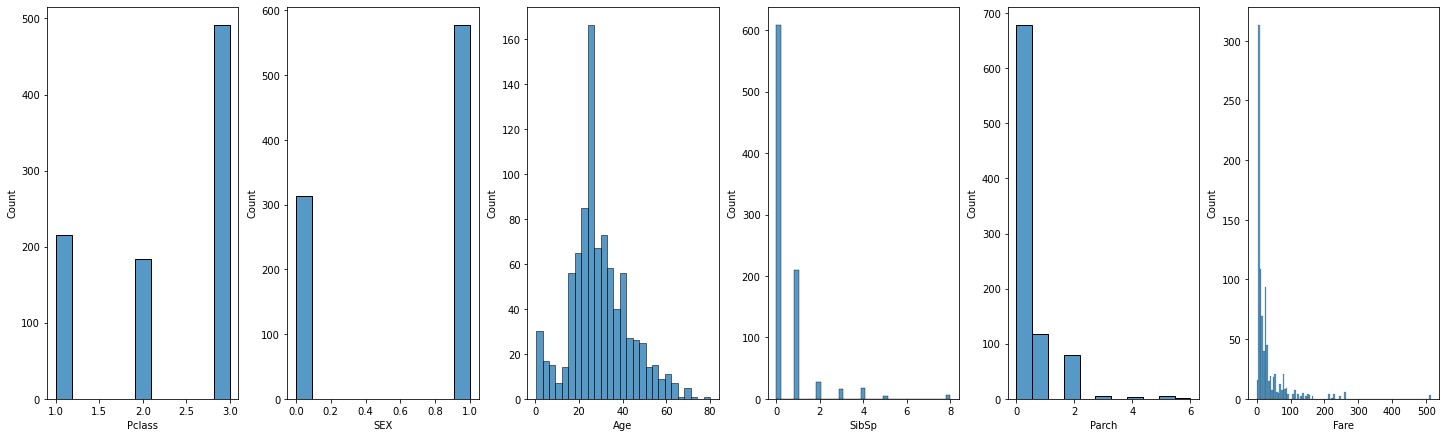

In [16]:
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 6))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [17]:
from sklearn.model_selection import train_test_split
# Splitting the datasets into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(X_train)}, {len(X_test)}")

Train and Test Size 712, 179


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
Logistic = LogisticRegression()
Logistic.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred = Logistic.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,auc,plot_confusion_matrix
acc_train = accuracy_score(y_train, Logistic.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {acc_train:0.4}, Test Accuracy: {acc_test:0.4}')

Train Accuracy: 0.8048, Test Accuracy: 0.8268


In [22]:
probs = Logistic.predict_proba(X_test)
probs

array([[0.69503208, 0.30496792],
       [0.88968388, 0.11031612],
       [0.86423922, 0.13576078],
       [0.84588507, 0.15411493],
       [0.06774134, 0.93225866],
       [0.15839239, 0.84160761],
       [0.87910672, 0.12089328],
       [0.90415912, 0.09584088],
       [0.0870749 , 0.9129251 ],
       [0.87234705, 0.12765295],
       [0.76031068, 0.23968932],
       [0.85489963, 0.14510037],
       [0.50244816, 0.49755184],
       [0.85071174, 0.14928826],
       [0.33652459, 0.66347541],
       [0.32133006, 0.67866994],
       [0.74776275, 0.25223725],
       [0.41915771, 0.58084229],
       [0.04968031, 0.95031969],
       [0.79899391, 0.20100609],
       [0.73952874, 0.26047126],
       [0.67452013, 0.32547987],
       [0.67452013, 0.32547987],
       [0.88699393, 0.11300607],
       [0.73323527, 0.26676473],
       [0.37383493, 0.62616507],
       [0.88005257, 0.11994743],
       [0.88005257, 0.11994743],
       [0.57290242, 0.42709758],
       [0.58123349, 0.41876651],
       [0.

In [23]:
preds1 = probs[:, 1]

fpr1, tpr1, threshold1 = roc_curve(y_test, preds1, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
roc_auc1

0.8807065217391304

Text(0, 0.5, 'True Positive Rate')

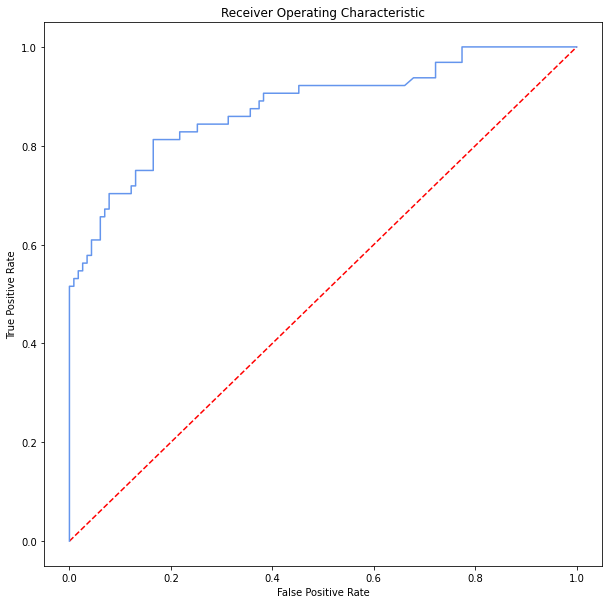

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax.plot([0, 1], [0, 1], 'r--')
ax.plot(fpr1, tpr1, 'cornflowerblue')
ax.set_title("Receiver Operating Characteristic")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

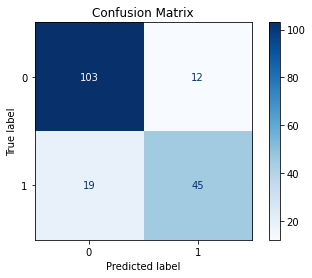

In [25]:
plot_confusion_matrix(Logistic, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)